# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./mnist/train.csv', index_col=['index'])
df.head()

,label,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
index,,,,,,,,,,,,,,,,,,,,,
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 데이터 어레이 형태로 만들기

In [3]:
X_array = df.iloc[:, 1:].to_numpy()
y_array = df.iloc[:,0].to_numpy()
X_array.shape, y_array.shape

((60000, 784), (60000,))

# 타겟 클래스 원핫 인코딩

In [4]:
from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder(dtype=int)

In [5]:
oh_enc.fit([[i] for i in range(10)])
y_array = oh_enc.transform(y_array.reshape(-1, 1)).toarray()
y_array[:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

# x데이터 차원 정리

In [6]:
X_array = X_array.reshape(-1,28,28, 1).astype(float) / 255
X_array.shape

(60000, 28, 28, 1)

# 이미지 시각화

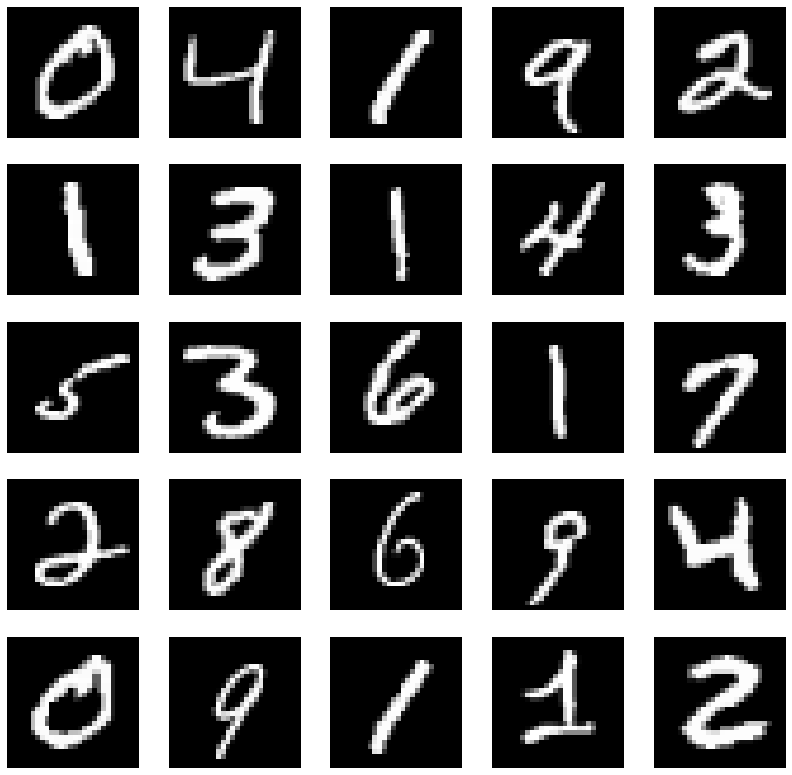

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 14))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.imshow(X_array[i], 'gray')
    plt.axis('off')
plt.show()

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [9]:
#  모델 컴파일하기
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, stratify=y_array, random_state=4)
print(np.sum(y_train, axis=0))
print(np.sum(y_test, axis=0))

[4738 5394 4766 4905 4674 4337 4734 5012 4681 4759]
[1185 1348 1192 1226 1168 1084 1184 1253 1170 1190]


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
e_st = EarlyStopping(patience=2, restore_best_weights=True)

In [13]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.25, callbacks=[e_st], batch_size=256)

Epoch 1/10
141/141 [==============================] - 17s 115ms/step - loss: 0.7005 - accuracy: 0.7979 - val_loss: 0.1859 - val_accuracy: 0.9445
Epoch 2/10
141/141 [==============================] - 16s 111ms/step - loss: 0.1722 - accuracy: 0.9471 - val_loss: 0.1502 - val_accuracy: 0.9517
Epoch 3/10
141/141 [==============================] - 16s 110ms/step - loss: 0.1221 - accuracy: 0.9623 - val_loss: 0.1025 - val_accuracy: 0.9689
Epoch 4/10
141/141 [==============================] - 15s 109ms/step - loss: 0.0955 - accuracy: 0.9707 - val_loss: 0.1056 - val_accuracy: 0.9693
Epoch 5/10
141/141 [==============================] - 15s 106ms/step - loss: 0.0893 - accuracy: 0.9729 - val_loss: 0.0866 - val_accuracy: 0.9740
Epoch 6/10
141/141 [==============================] - 15s 107ms/step - loss: 0.0714 - accuracy: 0.9779 - val_loss: 0.0756 - val_accuracy: 0.9774
Epoch 7/10
141/141 [==============================] - 15s 108ms/step - loss: 0.0646 - accuracy: 0.9807 - val_loss: 0.0879 - val_ac

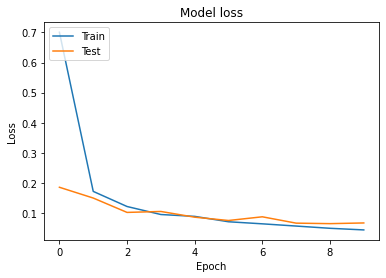

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
model.evaluate(x_test, y_test)

375/375 [==============================] - 2s 5ms/step - loss: 0.0812 - accuracy: 0.9755


[0.08122505992650986, 0.9754999876022339]

In [16]:
df_test = pd.read_csv('./mnist/test.csv', index_col = ['index'])
df_test

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_array = df_test.to_numpy()
X_array.shape

(10000, 784)

In [18]:
X_array = X_array.reshape(-1,28,28, 1).astype(float) / 255
X_array.shape

(10000, 28, 28, 1)

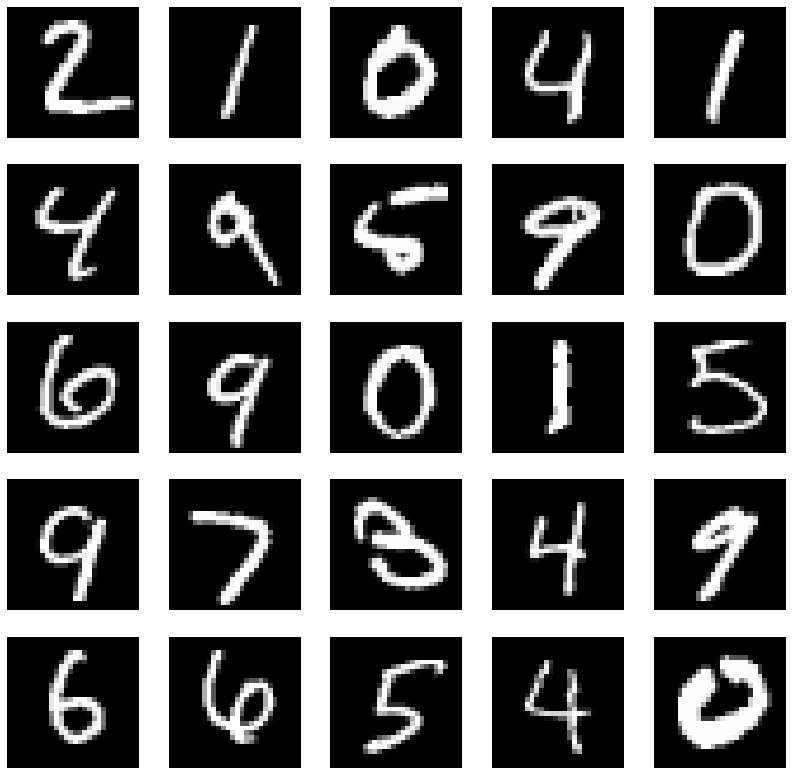

In [19]:
plt.figure(figsize=(14, 14))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.imshow(X_array[i], 'gray')
    plt.axis('off')
plt.show()

In [20]:
pr = model.predict(X_array)
pr[0]

array([1.03510331e-06, 1.83131283e-06, 1.56978320e-04, 1.71302803e-04,
       5.60525955e-08, 5.57209603e-07, 1.10898596e-10, 9.99603689e-01,
       1.10605833e-06, 6.33086383e-05], dtype=float32)

In [23]:
np.argmax(pr[1])

2

In [25]:
df_test['label'] = np.array(map(lambda x: np.argmax(x), pr))

In [26]:
df_test = df_test.loc[:,['label']]
df_test.head()

,label
index,
0,7
1,2
2,1
3,0
4,4


In [27]:
df_test.to_csv('mysubmit.csv')